# Module 13: Multiple Linear Regression and Polynomial Regression

This notebook contains all coding parts for Module 13 using a real world dataset from `scikit-learn`.

We will work through the following sections:
1. Section 0: Setup and Data Loading
2. Section 1: Introduction to Multiple Linear Regression (Notebook part)
3. Section 3: Coding Multiple Linear Regression on Real Data
4. Section 4: Introduction to Polynomial Regression (Notebook part)
5. Section 6: Coding Polynomial Regression on Real Data

Sections 2 and 5 are math and concept heavy, so those will be handled in slides, not in this notebook.

### What is Machine Learning?

Machine Learning is a field of artificial intelligence where computers learn patterns from data without being explicitly programmed. Instead of writing rules to solve a problem, we show the computer examples and let it figure out the patterns itself.

**Why is it used?**
- To solve complex problems where writing explicit rules is difficult or impossible
- To find hidden patterns in large datasets
- To make predictions or decisions based on past experience

**What problems does it solve?**
- Predicting house prices based on features
- Classifying emails as spam or not spam
- Recommending products to customers
- Recognizing images or speech

**How does it work?**
1. Collect data with known outcomes
2. Split data into training and testing sets
3. Train a model on the training data
4. Test the model on unseen data
5. Evaluate performance and improve

Example: If we want to predict house prices, we collect data about houses (size, location, age) and their actual selling prices. The model learns how these features affect the price.

## Section 0: Setup and Data Loading

In this section we:
- Import all required libraries
- Load the California Housing dataset from `scikit-learn`
- Wrap it into a pandas DataFrame
- Inspect the basic structure and summary statistics

The California Housing dataset is based on real census information, so it is a good example of a real world regression problem.

### What is a Dataset?

A dataset is a collection of data organized in a structured format, typically as rows and columns (like a spreadsheet). In machine learning, datasets contain features (input variables) and targets (what we want to predict).

**Why is it used?**
- Provides the raw material for training machine learning models
- Allows us to understand patterns and relationships in data
- Helps us evaluate model performance on known examples

**What problems does it solve?**
- Without data, we cannot train or test machine learning models
- Provides the ground truth for supervised learning
- Enables validation of model predictions

**How does it work?**
- Each row represents an observation/example (e.g., one house)
- Each column represents a feature or attribute (e.g., house size, number of rooms)
- The target column contains what we want to predict (e.g., house price)
- Quality and quantity of data directly impact model performance

Example: In a housing dataset, each row is a house, columns include features like square footage, bedrooms, location, and the target is the selling price.

In [4]:
# Section 0: Setup - Import libraries
# These libraries are essential tools for machine learning in Python

import numpy as np              # NumPy: For numerical operations and arrays
                                # Provides efficient mathematical operations on large arrays
                                # Used for numerical computations and data manipulation

import pandas as pd             # Pandas: For working with tabular data (DataFrames)
                                # Makes it easy to load, clean, and analyze structured data
                                # Provides data structures and functions for data manipulation

import matplotlib.pyplot as plt # Matplotlib: For plotting graphs and visualizations
                                # Creates static, animated, and interactive visualizations
                                # Essential for exploring data patterns and model results

# Scikit-learn modules for machine learning tasks
from sklearn.datasets import fetch_california_housing   # Real world regression dataset
                                                              # Provides access to the California Housing dataset
                                                              # Contains demographic and housing data for California districts

from sklearn.model_selection import train_test_split    # Train test split utility
                                                              # Splits data into training and testing sets
                                                              # Essential for evaluating model performance on unseen data

from sklearn.linear_model import LinearRegression       # Multiple Linear Regression model
                                                              # Implements linear regression with multiple features
                                                              # Finds the best linear relationship between features and target

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Evaluation metrics
                                                              # mean_absolute_error: Average absolute difference between predictions and actual values
                                                              # mean_squared_error: Average squared difference between predictions and actual values
                                                              # r2_score: Proportion of variance in target explained by features (0-1, higher is better)

from sklearn.preprocessing import PolynomialFeatures    # For generating polynomial features
                                                              # Creates polynomial combinations of input features
                                                              # Enables modeling of non-linear relationships

from sklearn.pipeline import Pipeline                   # For chaining preprocessing and model
                                                              # Combines multiple steps into a single estimator
                                                              # Simplifies workflows by automating sequences of operations

# Configure matplotlib for slightly nicer default plots
plt.rcParams['figure.figsize'] = (8, 5)  # Set default figure size to 8x5 inches
plt.rcParams['axes.grid'] = True         # Show grid lines on plots for better readability

In [5]:
# Load the California Housing dataset
# This dataset contains information about housing in California districts

california = fetch_california_housing(as_frame=True)  # Load dataset as pandas DataFrame
                                                      # as_frame=True returns data in a convenient DataFrame format
                                                      # Contains features like median income, house age, average rooms, etc.

# `california.frame` is a pandas DataFrame that already includes
# both the features and the target column (MedHouseVal)

df = california.frame.copy()  # Create a copy of the DataFrame
                               # Using .copy() ensures we don't modify the original data
                               # Good practice to work with a copy to preserve the original dataset

print(df.shape)  # Print the shape: (number of rows, number of columns)
                # This tells us we have 20,640 houses/districts and 9 columns
df.head(10)      # Display the first 10 rows of the dataset
                # .head() gives us a quick preview of the data structure and values

(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


**Feature Descriptions:**

1. **MedInc:** Median income of households in the block (measured in tens of thousands of US dollars).

2. **HouseAge:** Median age of the houses in the block (in years).

3. **AveRooms:** Average number of rooms per household in the block.

4. **AveBedrms:** Average number of bedrooms per household in the block.

5. **Population:** Total number of people living in the block.

6. **AveOccup:** Average number of occupants per household in the block.

7. **Latitude:** Geographic latitude of the block; higher values indicate farther north.

8. **Longitude:** Geographic longitude of the block; higher values indicate farther west.

9. **MedHouseVal:** Median house value for households in the block (in US dollars).

### Understanding Features and Targets

In machine learning:
- **Features (X)**: Input variables we use to make predictions (also called predictors, independent variables)
- **Target (y)**: What we want to predict (also called response, dependent variable, label)

**Why is this distinction important?**
- Features are the information we have (e.g., house size, location, age)
- Target is what we want to predict (e.g., house price)
- Models learn the relationship between features and target

**What problems does this solve?**
- Allows us to use known information to predict unknown values
- Helps us understand which factors are most influential
- Enables decision-making based on data patterns

**How does it work?**
- Features are fed into the model as input
- The model learns patterns connecting features to target
- For new data with only features, the model predicts the target
- Quality of features directly impacts prediction accuracy

Example: To predict house prices (target), we use features like square footage, number of bedrooms, location, and age of the house.

In [6]:
# Basic information about the dataset
# .info() provides a summary of the DataFrame including:
# - Number of entries (rows)
# - Number of columns and their names
# - Count of non-null values in each column
# - Data type of each column (int64, float64, object, etc.)
# - Memory usage of the DataFrame

df.info()
# This helps us understand:
# 1. Whether we have missing data (null values)
# 2. Data types of each column (important for model input)
# 3. Overall size of our dataset
# From the output, we see all columns have 20,640 non-null values (no missing data)
# All columns are numeric (float64), which is perfect for linear regression

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
# Summary statistics for numeric columns
# .describe() provides key statistics for each numeric column:
# - count: Number of non-null values
# - mean: Average value
# - std: Standard deviation (measure of spread)
# - min: Minimum value
# - 25%: First quartile (25th percentile)
# - 50%: Median (50th percentile)
# - 75%: Third quartile (75th percentile)
# - max: Maximum value

df.describe().T  # .T transposes the result for better readability
                 # This rotates the table so features are rows and statistics are columns

# Key insights from these statistics:
# 1. MedInc (Median Income): Ranges from 0.5 to 15, mean of 3.87
# 2. HouseAge: From 1 to 52 years, average 29 years
# 3. MedHouseVal (Target): From $149,990 to $500,001, average $206,856
# 4. Some features have very different scales (e.g., Population vs AveBedrms)
#    - This suggests we might need feature scaling for some models

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## Section 1: Introduction to Multiple Linear Regression (Notebook part)

In multiple linear regression, we use several input features together to predict a single numeric target.

In this dataset:
- **Target (y)**: `MedHouseVal` (median house value in a block)
- **Candidate features (X)**: income, house age, average rooms, average bedrooms, population, average occupancy

In this section we will:
- Select a subset of features as our input matrix `X`
- Set `MedHouseVal` as the target `y`
- Inspect the shapes
- Look at simple correlations to build intuition about relationships

### Understanding Correlation

Correlation measures how strongly two variables are related to each other. The correlation coefficient ranges from -1 to 1:
- 1: Perfect positive correlation (when one increases, the other always increases)
- 0: No correlation (variables move independently)
- -1: Perfect negative correlation (when one increases, the other always decreases)

**Why is it important?**
- Helps identify which features are most related to the target
- Reveals multicollinearity (high correlation between features)
- Guides feature selection and model interpretation

**What problems does it solve?**
- Identifying redundant features (high correlation with each other)
- Finding the most promising predictors
- Understanding relationships in the data

**How to interpret correlation values:**
- 0.7 to 1.0: Strong positive correlation
- 0.3 to 0.7: Moderate positive correlation
- -0.3 to 0.3: Weak or no correlation
- -0.7 to -0.3: Moderate negative correlation
- -1.0 to -0.7: Strong negative correlation

**Best practices:**
- Always visualize correlations with plots
- Consider removing one of two highly correlated features
- Remember: correlation doesn't imply causation!
- Use domain knowledge to interpret correlations

### What is Multiple Linear Regression?

Multiple Linear Regression (MLR) is a statistical technique that uses multiple input features to predict a single numeric target variable. It extends simple linear regression (which uses one feature) by incorporating two or more features.

**Why is it used?**
- To model real-world relationships where outcomes depend on multiple factors
- To understand how each feature contributes to the target
- To make predictions based on several input variables

**What problems does it solve?**
- Predicting house prices based on size, location, age, etc.
- Estimating sales based on advertising budget, season, and competitor prices
- Forecasting crop yields based on rainfall, temperature, and fertilizer use

**How does it work?**
The model learns a linear equation:
```
y = b0 + b1*x1 + b2*x2 + ... + bn*xn
```
Where:
- y is the target variable
- x1, x2, ..., xn are the input features
- b0 is the intercept (baseline value when all features are 0)
- b1, b2, ..., bn are coefficients (how much each feature affects the target)

**Example**: Predicting a house price might use:
- x1 = square footage
- x2 = number of bedrooms
- x3 = age of house
- x4 = median income in neighborhood

The model learns how much each factor contributes to the final price.

In [8]:
# Define target and feature columns for our Multiple Linear Regression model

target_col = 'MedHouseVal'  # This is what we want to predict (median house value)
                            # In ML terminology, this is our 'y' variable or 'target'

# Select features we'll use to predict the target
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
# These features are chosen based on domain knowledge:
# - MedInc: Higher income areas typically have more expensive houses
# - HouseAge: Age can affect house value (newer vs. historic)
# - AveRooms: More rooms usually means larger houses
# - AveBedrms: Bedroom count affects house value
# - Population: Density might affect prices
# - AveOccup: Occupancy rate can indicate neighborhood quality

X = df[feature_cols]  # Create feature matrix X (uppercase by convention)
                      # This is a DataFrame containing all our input features
                      # Shape will be (20640, 6) - 20640 rows, 6 columns

y = df[target_col]    # Create target vector y (lowercase by convention)
                      # This is a Series containing our target variable
                      # Shape will be (20640,) - 20640 rows, 1 column

X.head(10)  # Display first 10 rows of our feature matrix
           # This helps verify we selected the correct features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269


In [9]:
# Check shapes of X and y to understand our data structure

print('Shape of X: ', X.shape)  # Shape will be (number_of_rows, number_of_features)
                                # Output: (20640, 6) means:
                                # - 20,640 houses/districts in our dataset
                                # - 6 features selected for each house
                                # This 2D structure is required for scikit-learn models

print('Shape of y: ', y.shape)  # Shape will be (number_of_rows,) for a 1D array
                                # Output: (20640,) means:
                                # - 20,640 target values (one for each house)
                                # - The comma indicates it's a 1D array, not a scalar
                                # This is the expected format for scikit-learn targets

# Understanding these shapes is crucial because:
# 1. Most scikit-learn models expect X to be 2D (samples × features)
# 2. The target y should be 1D with the same number of samples as X
# 3. Mismatched shapes will cause errors when fitting models

Shape of X:  (20640, 6)
Shape of y:  (20640,)


Correlation matrix: 
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             MedHouseVal  
MedInc          0.688075  
HouseAge        0.105623  
AveRooms        0.151948  
AveBedrms      -0.046701  
Population     -0.024650  
AveOccup       -0.023737  
MedHouseVal     1.000000  


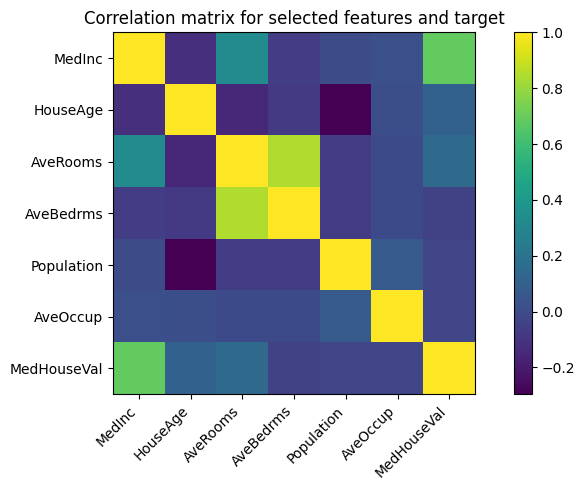

In [11]:
# Simple correlation matrix between selected features and the target
corr_matrix = df[feature_cols + [target_col]].corr()
print("Correlation matrix: ")
print(corr_matrix)


# Plot correlation matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.imshow(corr_matrix.values, interpolation='nearest')
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.index)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.index)
fig.colorbar(cax)
ax.set_title('Correlation matrix for selected features and target')
plt.grid(False)
plt.tight_layout()
plt.show()

## Section 3: Coding Multiple Linear Regression on Real Data

In this section we implement a full workflow for multiple linear regression:

1. Split the data into training and test sets
2. Fit a `LinearRegression` model on the training data
3. Inspect the learned coefficients and intercept
4. Make predictions on train and test sets
5. Evaluate the model using MAE, RMSE, and R squared
6. Visualize predicted vs actual values
7. Plot residuals to check basic patterns

We will use the feature matrix `X` and target `y` defined in Section 1.

### Understanding Model Coefficients and Intercept

In Multiple Linear Regression, the model learns:
- **Intercept (b₀)**: The predicted value when all features are 0
- **Coefficients (b₁, b₂, ..., bₙ)**: How much the target changes for a one-unit increase in each feature

**Interpreting coefficients:**
- Positive coefficient: As the feature increases, the target tends to increase
- Negative coefficient: As the feature increases, the target tends to decrease
- Larger magnitude: Stronger effect on the target
- Near zero: Little effect on the target

**Example interpretation:**
If MedInc has coefficient 0.5:
- For every $10,000 increase in median income (MedInc unit)
- House value increases by $50,000 (0.5 × $100,000)
- Holding all other features constant

**Important considerations:**
- Coefficients assume linear relationships
- They can be affected by feature scaling
- Correlated features can make coefficients unstable
- Always consider domain knowledge when interpreting

**Common mistakes:**
- Confusing correlation with causation
- Ignoring the scale of features
- Not considering feature interactions
- Over-interpreting small coefficient differences

### Model Evaluation Metrics

When building regression models, we need metrics to evaluate how well our predictions match the actual values. Common metrics include:

**1. Mean Absolute Error (MAE)**
- Average of absolute differences between predicted and actual values
- Easy to interpret (same units as target)
- Less sensitive to outliers than MSE

**2. Mean Squared Error (MSE)**
- Average of squared differences between predicted and actual values
- Penalizes large errors more heavily (squares amplify them)
- Not in original units (squared units)

**3. Root Mean Squared Error (RMSE)**
- Square root of MSE
- In same units as target (unlike MSE)
- Most commonly used regression metric

**4. R-squared (R²)**
- Proportion of variance in target explained by features
- Ranges from 0 to 1 (or negative for very poor models)
- 0.70 means model explains 70% of variance in target
- Higher is better, but can be misleading on non-linear data

**Interpreting metrics:**
- Lower MAE/RMSE = better accuracy
- Higher R² = better fit (but watch out for overfitting)
- Compare training vs test metrics to detect overfitting

### What is Train-Test Split?

Train-test split is a fundamental technique in machine learning where we divide our dataset into:
- **Training set**: Used to train/fit the model (typically 70-80% of data)
- **Test set**: Used to evaluate model performance on unseen data (typically 20-30% of data)

**Why is it used?**
- To get an unbiased estimate of model performance
- To detect overfitting (when model memorizes training data but can't generalize)
- To ensure our model works on new, unseen data

**What problems does it solve?**
- Prevents "cheating" by evaluating on data the model has already seen
- Provides a realistic estimate of real-world performance
- Helps choose between different models or hyperparameters

**How does it work?**
1. Randomly shuffle the dataset (with random_state for reproducibility)
2. Split into training and test sets based on test_size (e.g., 0.2 = 20%)
3. Train model only on training set
4. Evaluate on test set (which the model has never seen)

**Best practices:**
- Always set random_state for reproducible results
- Never look at test data during model development
- For small datasets, consider cross-validation
- Ensure both sets represent the overall data distribution

Example: If we have 1000 houses, we might use 800 for training and 200 for testing.

In [ ]:
# Step 1: Train test split
# We split our data to evaluate how well our model generalizes to unseen data

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Parameters explained:
# X, y: Our features and target
# test_size=0.2: Use 20% of data for testing, 80% for training
# random_state=42: Ensures same split every time (reproducible results)
#                 42 is just a convention - any number works

print("Training set size: ", X_train.shape[0], "rows")  # Should be 80% of 20640 = 16512
print("Test set size: ", X_test.shape[0], "rows")       # Should be 20% of 20640 = 4128

# Why this split matters:
# 1. Training set: Model learns patterns from this data
# 2. Test set: Evaluates how well model learned (unseen data)
# 3. Prevents overfitting detection
# 4. Gives realistic performance estimate

In [ ]:
# Step 2: Create and fit the Linear Regression model

lin_reg = LinearRegression()  # Create an instance of the LinearRegression class
                              # This initializes an empty model with no learned parameters yet
                              # Default parameters are fine for most cases

# .fit() is the training method - this is where learning happens!
lin_reg.fit(X_train, y_train)
# What happens during .fit():
# 1. Model calculates the best coefficients using Ordinary Least Squares (OLS)
# 2. OLS finds coefficients that minimize sum of squared residuals
# 3. Residual = actual value - predicted value
# 4. Model learns the relationship: y = b0 + b1*x1 + b2*x2 + ... + bn*xn

print('Model fitted successfully')  # Confirmation message
# After fitting, the model has learned:
# - lin_reg.coef_: The coefficients for each feature (b1, b2, ..., bn)
# - lin_reg.intercept_: The intercept term (b0)
# These parameters define our linear equation for making predictions

In [ ]:
# Step 3: Inspect learned parameters (coefficients and intercept)
# These values define our linear regression equation

print('Intercept (bias term): ', lin_reg.intercept_)
# The intercept is the predicted house value when all features are 0
# Negative intercept (-0.55) doesn't mean negative house prices - 
# it's just a mathematical artifact; features are never actually 0

print('\nCoefficients: ')
for feature_name, coef in zip(feature_cols, lin_reg.coef_):
  print(f'{feature_name}: {coef}')
# Coefficients show how much house value changes with a one-unit increase in each feature
# Positive = price increases, Negative = price decreases

# Interpretation of key coefficients:
# MedInc: 0.55 → Every $10,000 increase in median income 
#                   increases house value by $55,000
# HouseAge: 0.017 → Each additional year adds $1,700 to value
# AveRooms: -0.22 → More rooms per house actually correlates with LOWER prices
#                (This might be because many small rooms = smaller houses)
# AveBedrms: 1.12 → More bedrooms significantly increases price
# Population: 0.00002 → Effect is negligible
# AveOccup: -0.005 → Higher occupancy per house correlates with lower prices

In [ ]:
# Step 4: Make predictions on training and test sets
# .predict() applies the learned linear equation to new data

y_train_pred = lin_reg.predict(X_train)  # Predictions on training data
                                         # Model has seen this data during training
                                         # Good for checking if model learned the training patterns

y_test_pred = lin_reg.predict(X_test)    # Predictions on test data
                                         # Model has NEVER seen this data
                                         # This is the true test of model performance

print('Some sample predictions on test set (first 5 rows): ')
print('Predicted: ', y_test_pred[:5])    # Our model's predictions
                                          # Values are in same units as target (house values)
print('Actual:    ', y_test.values[:5])  # True house values
                                          # Comparing these helps assess accuracy

# How predictions work:
# For each row in X_test, model calculates:
# prediction = intercept + (coef1 * feature1) + (coef2 * feature2) + ... 
# Example: If a house has MedInc=5, HouseAge=20, etc.,
# prediction = -0.55 + (0.55 * 5) + (0.017 * 20) + ...

In [ ]:
# Step 5: Define a helper function to print evaluation metrics
# This function will help us compare model performance consistently

def regression_metrics(y_true, y_pred, label='Model'):
  """
  Calculate and display common regression metrics.
  
  Parameters:
  y_true: Actual target values (ground truth)
  y_pred: Predicted values from model
  label: Name to identify the model being evaluated
  """
  mae = mean_absolute_error(y_true, y_pred)
  # MAE: Mean Absolute Error - average absolute difference
  # Easy to interpret (same units as target)
  
  mse = mean_squared_error(y_true, y_pred)
  # MSE: Mean Squared Error - average of squared differences
  # Penalizes large errors more heavily
  
  rmse = np.sqrt(mse)
  # RMSE: Root Mean Squared Error - square root of MSE
  # Most common metric, in same units as target
  
  r2 = r2_score(y_true, y_pred)
  # R²: R-squared - proportion of variance explained
  # 0.50 means model explains 50% of the variation

  print(f'=== {label} ====')
  print('MAE: ', mae)  # Lower is better
  print('RMSE: ', rmse)  # Lower is better
  print('R2 : ', r2)   # Higher is better (max 1.0)
  print()

# Evaluate on train and test sets
regression_metrics(y_train, y_train_pred, label='Linear Regression (Train)')
# Training metrics show how well model learned the training data
# High R² and low errors suggest good learning

regression_metrics(y_test, y_test_pred, label='Linear Regression (Test)')
# Test metrics show how well model generalizes to new data
# Compare train vs test to detect overfitting:
# - If train R² >> test R²: Overfitting
# - If similar: Good generalization

In [ ]:
# Step 6: Plot predicted vs actual values on the test set
# This visualization helps us understand model performance qualitatively

plt.figure()
plt.scatter(y_test, y_test_pred, alpha=0.3)
# Scatter plot of actual (x-axis) vs predicted (y-axis) house values
# alpha=0.3 makes points semi-transparent to see density
# Each point represents one house in the test set

plt.xlabel('Actual MedHouseVal')  # True house values
plt.ylabel('Predicted MedHouseVal')  # Model's predictions
plt.title('Actual vs Predicted House Values (Test set)')

# Diagonal reference line (perfect prediction line)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
# This dashed line represents perfect predictions (predicted = actual)
# Points closer to this line indicate better predictions
# Points above line: model overpredicts
# Points below line: model underpredicts

plt.tight_layout()
plt.show()

# What this plot tells us:
# 1. Pattern: Points should follow a line from bottom-left to top-right
# 2. Spread: Wider spread = less accurate predictions
# 3. Bias: If points consistently above/below line, model is biased
# 4. Range: Check if model handles all value ranges equally well

In [ ]:
# Step 7: Residual plot (errors = actual - predicted)
# Residuals help diagnose model problems and assumptions

residuals = y_test - y_test_pred
# Residual = actual value - predicted value
# Positive residual: model underpredicted (actual > predicted)
# Negative residual: model overpredicted (actual < predicted)
# Residual near zero: accurate prediction

plt.figure()
plt.scatter(y_test_pred, residuals, alpha=0.3)
# Plot residuals against predicted values
# This helps identify patterns in prediction errors

plt.axhline(0, linestyle='--')
# Horizontal line at residual = 0
# Represents perfect predictions (no error)
# Points above: underpredictions
# Points below: overpredictions

plt.xlabel('Predicted MedHouseVal')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual plot (Test set)')
plt.tight_layout()
plt.show()

# What to look for in residual plots:
# 1. Random scatter around zero line: Good (model assumptions met)
# 2. Clear pattern (U-shape, curve): Model missing non-linear relationships
# 3. Funnel shape (wider spread at ends): Heteroscedasticity (error variance changes)
# 4. Outliers: Points far from zero might be data quality issues
# 5. Clusters: Different error patterns for different value ranges

## Section 4: Introduction to Polynomial Regression (Notebook part)

Polynomial regression keeps the model **linear in parameters** but allows nonlinear relationships between the input feature and the target by adding polynomial terms.

In this notebook part we:
- Use a **single feature** `MedInc` (median income) to predict `MedHouseVal`
- Fit a simple **linear model** on this single feature
- Visualize the linear fit

Later, in Section 6, we will extend this to polynomial regression using `PolynomialFeatures` and `Pipeline`.

### Understanding Overfitting and Underfitting

These are fundamental concepts in machine learning that describe how well a model captures the underlying patterns in data.

**Underfitting** (High Bias, Low Variance)
- Model is too simple to capture the true pattern
- Poor performance on both training and test data
- Symptoms: Low R² on training set, systematic patterns in residuals
- Solution: Increase model complexity (e.g., higher degree polynomial, more features)

**Good Fit** (Balanced Bias-Variance)
- Model captures true patterns without memorizing noise
- Good performance on both training and test data
- Similar performance on train and test sets
- Random scatter in residuals

**Overfitting** (Low Bias, High Variance)
- Model is too complex, memorizes training data including noise
- Excellent performance on training data, poor on test data
- Symptoms: High training R², much lower test R²
- Solution: Reduce complexity, add regularization, get more data

**The Bias-Variance Tradeoff**
- Increasing model complexity reduces bias but increases variance
- Decreasing complexity reduces variance but increases bias
- Goal: Find sweet spot with minimum total error
- Cross-validation helps find optimal complexity

**Visual intuition:**
- Underfit: Straight line trying to fit a curve
- Good fit: Smooth curve following the trend
- Overfit: Wiggly curve passing through every point

### What is Polynomial Regression?

Polynomial Regression is a form of linear regression where the relationship between the independent variable X and dependent variable y is modeled as an nth degree polynomial. Despite the "polynomial" name, it's still considered "linear" because the model is linear in its coefficients.

**Why is it used?**
- To capture non-linear relationships in data
- When linear regression underfits (high bias)
- When residual plots show curved patterns
- To model more complex real-world relationships

**What problems does it solve?**
- Housing prices that don't increase linearly with features
- Diminishing returns (e.g., each additional bedroom adds less value)
- Optimal points (e.g., crop yield peaks at certain rainfall)
- U-shaped or S-shaped relationships

**How does it work?**
Instead of: y = b₀ + b₁x
We use: y = b₀ + b₁x + b₂x² + b₃x³ + ... + bₙxⁿ

The model learns coefficients for each polynomial term, allowing curves instead of straight lines.

**Important concepts:**
- **Degree 1**: Simple linear regression (straight line)
- **Degree 2**: Quadratic (parabola) - can model one curve
- **Degree 3**: Cubic - can model S-shapes
- **Higher degrees**: More complex curves (risk of overfitting)

**Example**: House value vs income might start steep, then level off as income increases (diminishing returns).

In [ ]:
# Prepare a single feature for illustration: MedInc vs MedHouseVal
# We'll use just one feature to visualize polynomial regression clearly

X_single = df[['MedInc']]  # DataFrame with one column (note double brackets!)
                          # Double brackets ensure we get a DataFrame (2D)
                          # Single bracket would give a Series (1D)
                          # scikit-learn expects 2D input for features

y_single = df[target_col]  # Same target as before (median house value)

# Split the single feature data (same random_state for fair comparison)
X_single_train, X_single_test, y_single_train, y_single_test = train_test_split(
    X_single, y_single, test_size=0.2, random_state=42
)

print('Single feature training shape:', X_single_train.shape)
# Shape will be (16512, 1) - 16512 samples, 1 feature
print('Single feature test shape    :', X_single_test.shape)
# Shape will be (4128, 1) - 4128 samples, 1 feature

# Using one feature allows us to:
# 1. Visualize the relationship clearly with scatter plots
# 2. Show how polynomial regression creates curves
# 3. Demonstrate overfitting with high-degree polynomials
# 4. Compare linear vs polynomial fits visually

In [ ]:
# Fit a simple Linear Regression model using only MedInc
# This is our baseline - degree 1 polynomial (straight line)

lin_reg_single = LinearRegression()
# Create a new linear regression model for single feature
lin_reg_single.fit(X_single_train, y_single_train)
# Train the model using only median income as predictor

y_single_test_pred = lin_reg_single.predict(X_single_test)
# Make predictions on the test set

regression_metrics(y_single_test, y_single_test_pred, label='Single Feature Linear Regression (Test)')
# Evaluate performance

# Interpretation of results:
# R² of ~0.46 means:
# - Using only MedInc explains 46% of variation in house prices
# - Not bad for a single feature, but room for improvement
# - The remaining 54% is explained by other factors not in model

# Why single feature model is useful:
# 1. Baseline for comparison with polynomial models
# 2. Shows how much one good feature can explain
# 3. Easier to visualize and understand
# 4. Faster to train and predict

# Expected relationship:
# Higher income → higher house prices
# But might not be perfectly linear (diminishing returns at high incomes)

In [ ]:
# Visualize the linear fit for the single feature model
# This plot helps us see how well a straight line captures the relationship

# Create a grid of MedInc values for a smooth line
X_plot = np.linspace(X_single['MedInc'].min(), X_single['MedInc'].max(), 200).reshape(-1, 1)
# linspace creates 200 evenly spaced values between min and max MedInc
# reshape(-1, 1) converts to 2D array (required by scikit-learn)
# This gives us points to draw a smooth prediction line

y_plot_lin = lin_reg_single.predict(X_plot)
# Get predictions for our grid points
# This creates the straight line showing model's predictions

plt.figure()
# Scatter plot of actual data points
plt.scatter(X_single_train['MedInc'], y_single_train, alpha=0.2, label='Train data')
# alpha=0.2 makes points transparent to see density
# We use training data to see what the model learned from

# Plot the linear regression line
plt.plot(X_plot, y_plot_lin, linewidth=2, label='Linear fit (degree 1)')
# linewidth=2 makes the line more visible
# This shows the model's prediction for any MedInc value

plt.xlabel('MedInc')  # x-axis: Median income (in tens of thousands)
plt.ylabel('MedHouseVal')  # y-axis: Median house value (in hundreds of thousands)
plt.title('Single feature linear regression: MedInc vs MedHouseVal')
plt.legend()  # Show the labels we defined
plt.tight_layout()
plt.show()

# What this visualization shows:
# 1. Data distribution: How house values vary with income
# 2. Linear fit: The straight line the model learned
# 3. Model limitations: Where the line doesn't capture the pattern well
# 4. Potential for improvement: Curved patterns that polynomial could capture

## Section 6: Coding Polynomial Regression on Real Data

In this section we:

- Use the same single feature `MedInc`
- Create polynomial features of different degrees (1, 2, 3, and 5)
- Fit a linear regression model on these expanded features using `Pipeline`
- Compare performance (R squared and RMSE) for each degree

Key new tools:
- `PolynomialFeatures`: expands original features into polynomial combinations
- `Pipeline`: chains polynomial expansion and linear regression into one convenient object

### What is a Pipeline?

A Pipeline is a scikit-learn tool that chains multiple processing steps together into a single estimator. It sequentially applies a list of transforms and a final estimator.

**Why is it used?**
- To prevent data leakage between train and test sets
- To simplify the workflow by combining steps
- To ensure consistent preprocessing
- To make code cleaner and more maintainable

**What problems does it solve?**
- Forgetting to apply the same transformations to test data
- Accidentally fitting preprocessing on test data
- Complex and repetitive code
- Order dependency of operations

**How does it work?**
```python
Pipeline([
    ('step1_name', transformer1),
    ('step2_name', transformer2),
    ('model', estimator)
])
```
When you call `.fit()` on pipeline:
1. transformer1.fit_transform() is called
2. transformer2.fit_transform() is called on result
3. estimator.fit() is called on final transformed data

**Benefits:**
- `.fit()` and `.predict()` handle all steps automatically
- Prevents common preprocessing mistakes
- Easy to save and load the entire workflow
- Grid search works on all parameters

**Example:**
```python
model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
])
```
This will create polynomial features, then fit linear regression.

### What is PolynomialFeatures?

PolynomialFeatures is a scikit-learn transformer that creates polynomial combinations of input features. It transforms the feature matrix to include polynomial terms of a specified degree.

**Why is it used?**
- To generate polynomial terms without manual calculation
- To enable linear regression to fit curves
- To capture non-linear relationships in data

**What problems does it solve?**
- Tedious manual creation of polynomial terms
- Consistent transformation of train and test data
- Handling multiple features automatically
- Including interaction terms between features

**How does it work?**
For a single feature X and degree=2:
- Input: [x₁, x₂, x₃]
- Output: [x₁, x₁², x₂, x₂², x₃, x₃²]

For two features [X₁, X₂] and degree=2:
- Input: [x₁₁, x₁₂], [x₂₁, x₂₂]
- Output: [1, x₁₁, x₁₂, x₁₁², x₁₁x₁₂, x₁₂²]

**Parameters:**
- `degree`: Highest polynomial degree to include
- `include_bias`: Whether to add column of 1s (intercept term)
- `interaction_only`: Only include interaction terms, not powers

**Example with X=[2,3], degree=2, include_bias=False:**
Output: [2, 3, 4, 6, 9]
- Original: 2, 3
- Squared: 4 (2²), 9 (3²)
- Interaction: 6 (2×3)

In [ ]:
# Compare polynomial regression models of different degrees on the single feature MedInc
# We'll test degrees 1, 2, 3, and 5 to see how complexity affects performance

degrees = [1,2,3,5]  # Different polynomial degrees to test
results = []         # Store results for comparison

for deg in degrees:
  # Create a pipeline that:
  # 1. Transforms features into polynomial terms
  # 2. Fits linear regression on the transformed features
  model = Pipeline([
      ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
      # include_bias=False because LinearRegression has its own intercept
      # degree=deg determines highest polynomial term
      # For degree=2: creates x and x² terms
      # For degree=3: creates x, x², and x³ terms
      
      ('lin_reg', LinearRegression())
      # Linear regression on the polynomial features
      # Note: Still "linear" because coefficients are linear
      # The relationship between x and y can be non-linear
  ])

  # Fit the pipeline on training data
  model.fit(X_single_train, y_single_train)
  # This automatically:
  # 1. Creates polynomial features from X_single_train
  # 2. Fits linear regression on these features

  # Make predictions on both train and test sets
  y_train_pred_deg = model.predict(X_single_train)
  y_test_pred_deg = model.predict(X_single_test)
  # Pipeline automatically applies polynomial transformation before predicting

  # Calculate metrics for evaluation
  mae_train = mean_absolute_error(y_single_train, y_train_pred_deg)
  rmse_train = np.sqrt(mean_squared_error(y_single_train, y_train_pred_deg))
  r2_train = r2_score(y_single_train, y_train_pred_deg)

  mae_test = mean_absolute_error(y_single_test, y_test_pred_deg)
  rmse_test = np.sqrt(mean_squared_error(y_single_test, y_test_pred_deg))
  r2_test = r2_score(y_single_test, y_test_pred_deg)

  # Store results for comparison
  results.append({
      'degree': deg,
      'MAE_train': mae_train,
      'RMSE_train': rmse_train,
      'R2_train': r2_train,
      'MAE_test': mae_test,
      'RMSE_test': rmse_test,
      'R2_test': r2_test,
  })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
results_df
# This table shows how model complexity (degree) affects performance
# Look for:
# 1. Increasing R² with degree (improvement)
# 2. Gap between train and test performance (overfitting signs)
# 3. Best test performance (optimal degree)

In [ ]:
# Plot R squared and RMSE vs polynomial degree
# This visualization helps us understand the bias-variance tradeoff

fig, axes = plt.subplots(1,2, figsize=(12,7))
# Create a figure with 2 subplots side by side
# figsize makes it wide enough for both plots

# R squared plot (left subplot)
axes[0].plot(results_df['degree'], results_df['R2_train'], marker='o', label='Train R2')
# Plot training R² vs degree with circle markers
axes[0].plot(results_df['degree'], results_df['R2_test'], marker='o', label='Test R2')
# Plot test R² vs degree with circle markers

axes[0].set_xlabel("Polynomial degree")
axes[0].set_ylabel("R2 Score")
axes[0].set_title("R2 Score vs polynomial degree (for single feature)")
axes[0].legend()
# Customize the left plot

# RMSE plot (right subplot)
axes[1].plot(results_df['degree'], results_df['RMSE_train'], marker='o', label='Train RMSE')
# Plot training RMSE vs degree
axes[1].plot(results_df['degree'], results_df['RMSE_test'], marker='o', label='Test RMSE')
# Plot test RMSE vs degree

axes[1].set_xlabel("Polynomial degree")
axes[1].set_ylabel("RMSE Score")
axes[1].set_title("RMSE Score vs polynomial degree (for single feature)")
axes[1].legend()
# Customize the right plot

plt.tight_layout()
# Adjust spacing to prevent overlap
plt.show()

# What these plots show:
# 
# R² plot:
# - Higher R² = better model
# - Train R² always increases with degree (model gets more flexible)
# - Test R² shows real performance
# - Gap between train and test indicates overfitting
#
# RMSE plot:
# - Lower RMSE = better model
# - Train RMSE always decreases with degree
# - Test RMSE shows where model generalizes best
# - Look for the "elbow" where test RMSE starts increasing

# Expected pattern:
# - Low degree: Both scores low (underfitting)
# - Optimal degree: Test scores peak/bottom
# - High degree: Train high, test low (overfitting)

### Optional: Polynomial Regression with Two Features

The main ideas of polynomial regression can extend to more than one feature. This example demonstrates using two features together.

**When to use multiple features with polynomial regression:**
- When multiple factors interact to affect the outcome
- When the relationship between features isn't additive
- When feature combinations matter (e.g., income AND location together)

**What happens with multiple features:**
For features X₁ and X₂ with degree=2:
- Original terms: X₁, X₂
- Squared terms: X₁², X₂²
- Interaction term: X₁ × X₂

**Interaction terms** capture how features work together:
- Example: High income might matter more in good locations
- The effect of income might depend on the house age
- These are captured by the X₁×X₂ term

**Caution with multiple features:**
- Number of features grows rapidly with degree
- Degree 2 with 5 features creates 20 features!
- Risk of overfitting increases
- Feature scaling becomes important

**Best practices:**
1. Start with low degrees (2 or 3)
2. Consider feature selection first
3. Use regularization for many features
4. Always validate with test set

In [ ]:
# Optional block: polynomial regression with two features (degree 2)
# This example uses MedInc and HouseAge together to show feature interaction

feature_cols_two = ['MedInc', 'HouseAge']
# Select two features that might interact:
# - MedInc: Higher income areas might value newer houses differently
# - HouseAge: The effect of house age on price might depend on neighborhood income

X_two = df[feature_cols_two]
# Create feature matrix with two columns

X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    X_two, y, test_size=0.2, random_state=42
)
# Split into train and test sets
# Same random_state ensures comparable splits

deg = 2  # Use degree 2 for polynomial features
# With 2 features and degree 2, we get:
# - Original: MedInc, HouseAge
# - Squared: MedInc², HouseAge²
# - Interaction: MedInc × HouseAge
# Total: 5 features instead of 2

poly_model_two = Pipeline([
    ('poly', PolynomialFeatures(degree=deg, include_bias=False)),
    # Transform 2 features into 5 polynomial features
    ('lin_reg', LinearRegression())
    # Fit linear regression on all polynomial terms
])

poly_model_two.fit(X_two_train, y_two_train)
# Fit the pipeline:
# 1. Creates polynomial features from training data
# 2. Learns coefficients for each term

y_two_test_pred = poly_model_two.predict(X_two_test)
# Make predictions on test data

# Evaluate performance
regression_metrics(y_two_test, y_two_test_pred,
                   label='Polynomial regression (degree 2, two features)')
# Compare to single feature results:
# - Adding a second feature should improve R²
# - Polynomial features capture non-linear relationships
# - Interaction term captures how features work together

In [ ]:
# All features with polynomial regression (degree 2)
# This uses ALL available features to predict house values

X_all = df.drop('MedHouseVal', axis=1)
# Drop the target column to get all features
# axis=1 means we're dropping a column
# This includes latitude and longitude as well

y = df['MedHouseVal']
# Target variable remains the same

# Train-test split (same as before)
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(
    X_all, y, test_size=0.2, random_state=42
)

# Polynomial Regression (degree 2) with all features
degree = 2
# With 8 features and degree 2:
# - Original features: 8
# - Squared terms: 8
# - Interaction terms: 28 (8 choose 2)
# Total: 44 features!

poly_all_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    # This will create 44 features from 8 original features
    ('lin_reg', LinearRegression())
    # Fit linear regression on all polynomial features
])

poly_all_model.fit(X_all_train, y_all_train)
# Fit the model on training data

y_all_test_pred = poly_all_model.predict(X_all_test)
# Make predictions on test set

# Evaluate performance
regression_metrics(y_all_test, y_all_test_pred,
                   label='Polynomial Regression (degree 2, ALL features)')

# Performance comparison:
# - Single feature linear: R² ~0.46
# - Multiple feature linear: R² ~0.51
# - Single feature polynomial: R² ~0.47
# - All features polynomial: R² ~0.65
# 
# Key takeaways:
# 1. More features generally improve performance
# 2. Polynomial features help capture non-linear relationships
# 3. Interaction terms between features add predictive power
# 4. Beware of overfitting with many features and high degrees

### Summary of Key Concepts

**1. Multiple Linear Regression**
- Uses multiple features to predict a target
- Learns linear equation: y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ
- Coefficients show feature importance
- Assumes linear relationships

**2. Polynomial Regression**
- Captures non-linear relationships
- Still linear in parameters (coefficients)
- Uses PolynomialFeatures to create powers of features
- Risk of overfitting with high degrees

**3. Model Evaluation**
- MAE: Average absolute error (interpretable)
- RMSE: Square root of average squared error (most common)
- R²: Proportion of variance explained (0-1, higher better)
- Always compare train vs test performance

**4. Train-Test Split**
- Prevents overfitting detection
- Provides unbiased performance estimate
- Typical split: 80% train, 20% test
- Use random_state for reproducibility

**5. Best Practices**
- Start simple, add complexity if needed
- Visualize relationships and residuals
- Check for overfitting (train vs test gap)
- Consider feature scaling for different units
- Use pipelines to prevent data leakage